In [1]:
import pandas as pd

# This tells the computer to open the file you just uploaded
df = pd.read_csv('zomato.csv')

# This shows the first 5 rows so we can see the columns
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [5]:
import numpy as np

# A more robust function to handle 'NEW', '-', and '/5'
def clean_rate(value):
    if value == 'NEW' or value == '-' or pd.isna(value):
        return np.nan
    else:
        # This converts '4.1/5' string to 4.1 number
        value = str(value).split('/')[0]
        try:
            return float(value)
        except:
            return np.nan

# 1. Apply the rate cleaning
df['rate'] = df['rate'].apply(clean_rate)

# 2. Fill the missing ratings with the average (so we have no empty data)
df['rate'] = df['rate'].fillna(df['rate'].mean())

# 3. Clean the 'Cost' column (removing commas and handling empty values)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())

# 4. Drop columns we don't need to keep the screen clean
cols_to_drop = ['url', 'phone', 'listing_id']
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

print("Success! Data is now clean.")
df[['name', 'rate', 'approx_cost(for two people)']].head()

Success! Data is now clean.


,name,rate,approx_cost(for two people)
0,Jalsa,4.1,800.0
1,Spice Elephant,4.1,800.0
2,San Churro Cafe,3.8,800.0
3,Addhuri Udupi Bhojana,3.7,300.0
4,Grand Village,3.8,600.0


/tmp/ipython-input-3306841053.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')


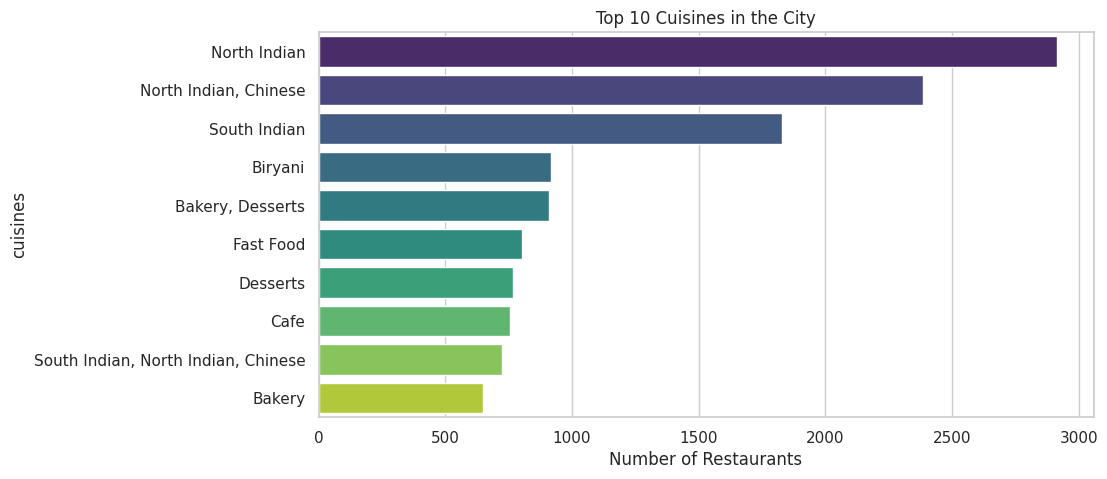

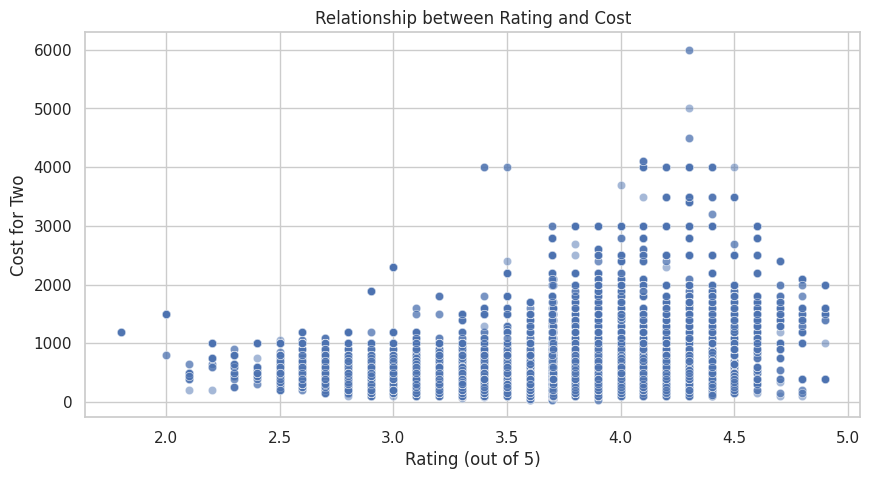

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for our charts
sns.set(style="whitegrid")

# 1. Chart: Top 10 Most Popular Cuisines
plt.figure(figsize=(10,5))
top_cuisines = df['cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines in the City')
plt.xlabel('Number of Restaurants')
plt.show()

# 2. Chart: Average Cost vs Rating
plt.figure(figsize=(10,5))
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df, alpha=0.5)
plt.title('Relationship between Rating and Cost')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Cost for Two')
plt.show()

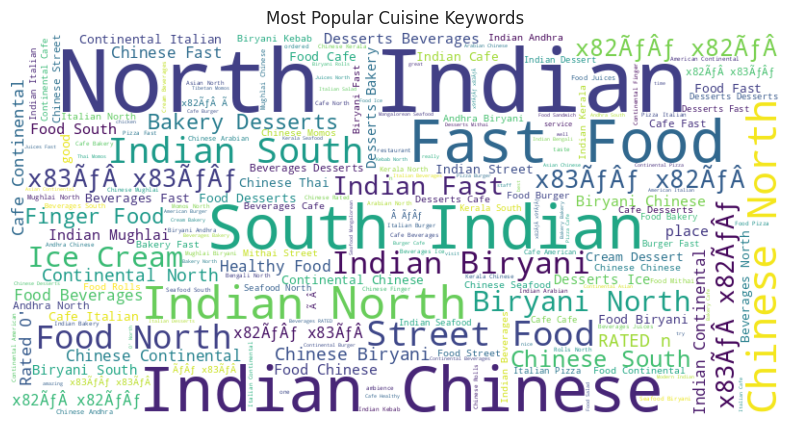

In [7]:
from wordcloud import WordCloud

# Combine all cuisines into one big string
all_cuisines = " ".join(df['cuisines'].astype(str))

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cuisines)

# Display it
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Most Popular Cuisine Keywords')
plt.show()

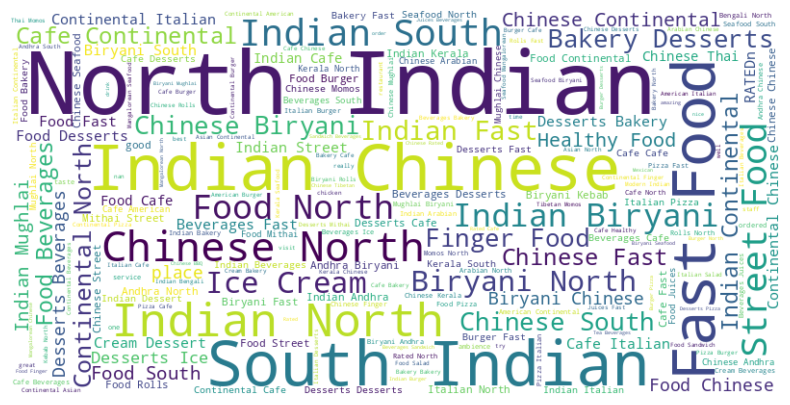

In [8]:
import re

# This function removes anything that isn't a normal letter or space
def simple_clean(text):
    # This 'regex' pattern keeps only a-z, A-Z, and spaces
    return re.sub(r'[^a-zA-Z\s]', '', str(text))

# Apply it to the cuisines column
df['cuisines_clean'] = df['cuisines'].apply(simple_clean)

# Now remake the WordCloud using the 'clean' column
all_cuisines_clean = " ".join(df['cuisines_clean'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cuisines_clean)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()